In [1]:
# install library

# !pip install gspread
# !pip install oauth2client

In [ ]:
import os
from pathlib import Path
from glob import glob
from tqdm.notebook import tqdm

import json
from slack_sdk import WebClient

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
sns.set(font='IPAexGothic', context='talk')

import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [3]:
# json_file = 'household-account-api-edaa721ed006.json'
# scope = ['https://spreadsheets.google.com/feeds',
#          'https://www.googleapis.com/auth/drive']

# credentials = ServiceAccountCredentials.from_json_keyfile_name(json_file, scope)
# gc = gspread.authorize(credentials)

# # if you use spread sheet file name 
# # file_name = 'AMEX_DB'
# # sh = gc.open(file_name)

# # if you use spread sheet url
# url = 'ttps://docs.google.com/spreadsheets/d/1BCYfBoQbehqcDRGAtRBmuS_KWwZ65PpXg9O_t3y_7AU/edit#gid=0'
# sp_key = url.split('/')[5]
# sh = gc.open_by_key(sp_key)

In [4]:
def read_gspread(json_file, url):
    scope = ['https://spreadsheets.google.com/feeds',
             'https://www.googleapis.com/auth/drive']

    credentials = ServiceAccountCredentials.from_json_keyfile_name(json_file, scope)
    gc = gspread.authorize(credentials)
    sp_key = url.split('/')[5]
    sh = gc.open_by_key(sp_key)
    return sh

In [5]:
sh = read_gspread(
        json_file='household-account-api-edaa721ed006.json',
        url='ttps://docs.google.com/spreadsheets/d/1BCYfBoQbehqcDRGAtRBmuS_KWwZ65PpXg9O_t3y_7AU/edit#gid=0')

In [6]:
# show spread-sheet sheet-list
sheet_list = [ws.title for ws in sh.worksheets()]
sheet_list

['2022', '2021']

In [22]:
ws=sh.worksheet('2022')

df_21 = pd.DataFrame(data=ws.get_all_values()[2:],
                     columns=ws.get_all_values()[1],
                    )

df_21['currency'] = df_21['currency'].astype(int)
# df_21

In [39]:
from gspread_dataframe import get_as_dataframe

df_sps = get_as_dataframe(ws, usecols=[i for i in range(1,4)], skiprows=1, header=0)
df_sps

,date,currency,breakdown
0,1/1/2022,980.0,カレコ・カ?シェアリングクラブ 東京都
1,1/2/2022,257.0,GOOGLE*CLOUD
2,1/2/2022,357.0,アマゾン シーオージェーピー
3,1/3/2022,1700.0,アマゾン シーオージェーピー
4,1/3/2022,2480.0,アマゾン ＪＰ マーケットプレイス
...,...,...,...
993,NaN,NaN,NaN
994,NaN,NaN,NaN
995,NaN,NaN,NaN
996,NaN,NaN,NaN


In [40]:
df_sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       511 non-null    object 
 1   currency   511 non-null    float64
 2   breakdown  511 non-null    object 
dtypes: float64(1), object(2)
memory usage: 23.5+ KB


In [8]:
ws=sh.worksheet(sheet_list[0])

df_22 = pd.DataFrame(data=ws.get_all_values()[2:],
                     columns=ws.get_all_values()[1],
                    )
df_22['currency'] = df_22['currency'].astype(int)
# df_22

In [9]:
df = pd.concat([df_21, df_22])

In [10]:
df['currency'] = df['currency'].astype(int)

df['date'] = pd.to_datetime(df['date'])

df.reset_index(drop=True).set_index('date')

,,currency,breakdown
date,,,
2021-01-01,,1427,アマゾン シーオージェーピー
2021-01-01,,679,アマゾン シーオージェーピー
2021-01-01,,1480,Ａｐｐｌｅ ｉＴｕｎｅｓ Ｓｔｏｒｅ
2021-01-02,,7920,アリオ 専門店
2021-01-02,,2310,アリオ 専門店 食品
...,...,...,...
2022-04-11,,5000,Ｓｕｉｃａ〔携帯決済〕 東京都 渋谷区
2022-04-15,,1075,東急ストア
2022-04-15,,35234,申告所得税及復興特別所得税 東京都 千


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1612 entries, 0 to 510
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0              1612 non-null   object        
 1   date       1604 non-null   datetime64[ns]
 2   currency   1612 non-null   int64         
 3   breakdown  1612 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 63.0+ KB


In [12]:
df

,,date,currency,breakdown
0,,2021-01-01,1427,アマゾン シーオージェーピー
1,,2021-01-01,679,アマゾン シーオージェーピー
2,,2021-01-01,1480,Ａｐｐｌｅ ｉＴｕｎｅｓ Ｓｔｏｒｅ
3,,2021-01-02,7920,アリオ 専門店
4,,2021-01-02,2310,アリオ 専門店 食品
...,...,...,...,...
506,,2022-04-11,5000,Ｓｕｉｃａ〔携帯決済〕 東京都 渋谷区
507,,2022-04-15,1075,東急ストア
508,,2022-04-15,35234,申告所得税及復興特別所得税 東京都 千
509,,2022-03-21,2420,エ?スコンタクト３Ｃシステム月会費等


In [13]:
df.describe(datetime_is_numeric=True, include='all')

,,date,currency,breakdown
count,1612,1604,1612.000000,1612
unique,1,NaN,NaN,324
top,,NaN,NaN,アマゾン シーオージェーピー
freq,1612,NaN,NaN,115
mean,NaN,2021-09-30 18:33:13.017456384,3095.320099,NaN
min,NaN,2021-01-01 00:00:00,-486162.000000,NaN
25%,NaN,2021-06-01 00:00:00,680.000000,NaN
50%,NaN,2021-09-10 00:00:00,1780.000000,NaN
75%,NaN,2022-01-31 00:00:00,3998.500000,NaN
max,NaN,2022-06-16 00:00:00,267380.000000,NaN


In [14]:
tmp = df.groupby('breakdown').sum().sort_values('currency', ascending=False).head(20)
tmp

,currency
breakdown,
Ｓｕｉｃａ〔携帯決済〕 東京都 渋谷区,522213
アップルストア オンライン,448422
ＩＤＣ 大塚家具 新宿ＳＲ ?東京都,363260
アマゾン ＪＰ マーケットプレイス,247021
PAYPAL *EBAYJAPANHE,199344
アマゾン シーオージェーピー,199074
ｄ払いＢ 東急ストア ?東京都 目黒区,148303
楽天トラベル国内宿泊 東京都 世田谷区,135780
レモンガス株式会社 東京都 港区,124419


In [15]:
tmp = df.groupby('breakdown').count().sort_values('currency', ascending=False).head(20)
tmp

,,date,currency
breakdown,,,
アマゾン シーオージェーピー,115,115,115
東急ストア,112,112,112
ｄ払いＢ 東急ストア ?東京都 目黒区,92,92,92
クイックペイプラス,88,88,88
アマゾン ＪＰ マーケットプレイス,76,76,76
Ｓｕｉｃａ〔携帯決済〕 東京都 渋谷区,70,70,70
ｄ払いＢ 東京ミッドタウン,58,58,58
Ａｐｐｌｅ ｉＴｕｎｅｓ Ｓｔｏｒｅ,47,47,47
スギ薬局 六本木店 東京都 港区,39,39,39


In [16]:
tmp = df.groupby('breakdown').mean().sort_values('currency', ascending=False).head(20)
tmp

,currency
breakdown,
ＩＤＣ 大塚家具 新宿ＳＲ ?東京都,181630.0
アップルストア オンライン,74737.0
楽天トラベル国内宿泊 東京都 世田谷区,67890.0
ボズュー ?東京都 港区,48400.0
北海道留萌市〔さとふる〕 北海道 留萌,39000.0
テンピュール銀座ショールーム 東京都,37620.0
アメックス トラベル オンライン,37326.0
富士吉田市〔さとふる〕 山梨県 富士吉,30000.0
北斗歯科医院 東京都 港区,27500.0


In [17]:
df_22.groupby('breakdown').sum().sort_values('currency', ascending=True).head(20)

,currency
breakdown,
前回分口座振替金額,-1177363
PP*4131CODE,0
GOOGLE *GOOGLE STORAGE,0
GOOGLE*CLOUD 8X6Z8F,1
ｄ払いＢ 日本郵便,84
おきなわワールド空港売店 沖縄県 那覇,130
ｄ払いＢ ＡＮＡＦＥＳＴＡ,132
PAYPAL *SHEIN,138
Ｈｅｌｌｏ Ｃｙｃｌｉｎｇ 東京都 港,140


In [18]:
df_21.groupby('breakdown').sum().sort_values('currency', ascending=True).head(20)

,currency
breakdown,
リターン・プロテクションご返金分,-7480
電気代,0
GOOGLE*CLOUD ESXFAP GOOGLE CLOUD JA,51
GOOGLE*CLOUD AP6PFR GOOGLE CLOUD JA,52
消費税,85
GOOGLE*CLOUD NVK7C6 GOOGLE CLOUD JA,102
ｄ払いＢ 日本郵便,140
マクドナルドモバイルオ?ダ? 新潟県,150
伊東屋 本店,275


In [19]:
time_series = df.groupby('date').sum()
time_series.sort_values('currency')

,currency
date,
2022-05-10,-480993
2022-06-10,-367106
2022-04-11,-302146
2022-01-17,-19856
2021-03-12,-4919
...,...
2021-06-18,86934
2021-06-21,104808
2022-03-18,149090


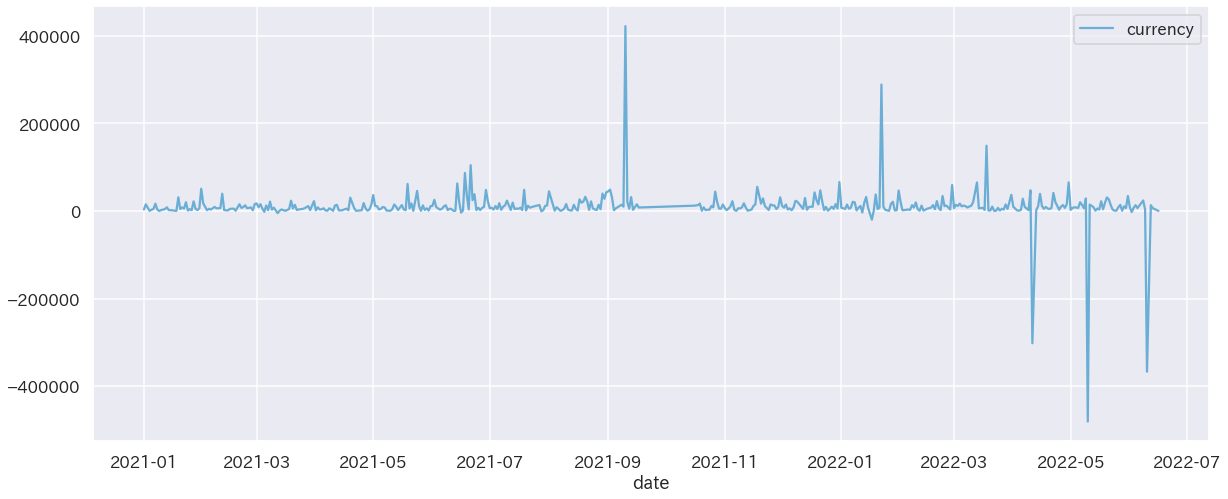

In [20]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=time_series, palette='Blues')
plt.show()

<AxesSubplot:ylabel='Count'>

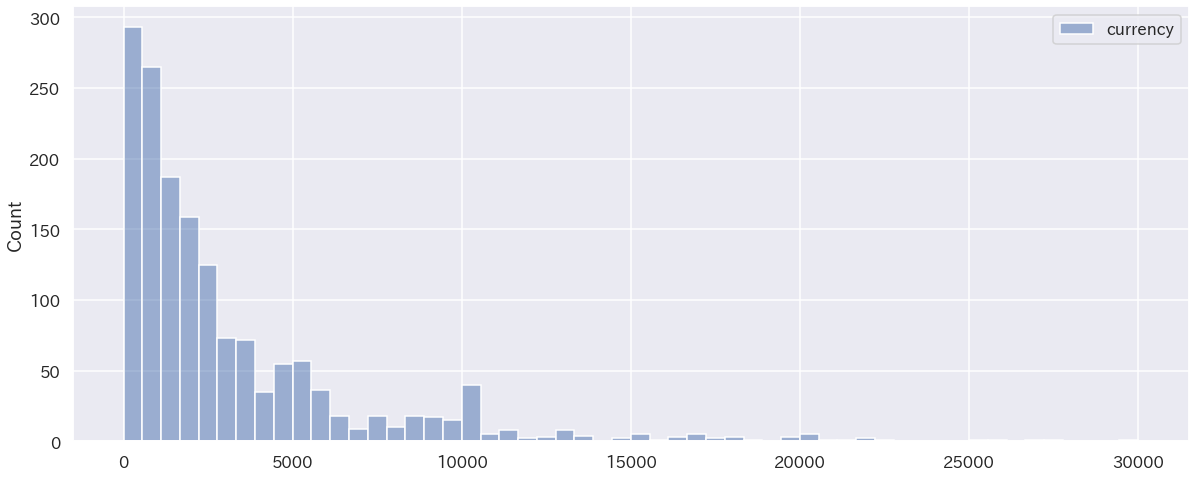

In [21]:
plt.figure(figsize=(20, 8))
sns.histplot(data=df,
            binrange=(0, 30_000))